In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pokmon-combat-power-prediction/pokemon.csv


In [2]:
url = "/kaggle/input/pokmon-combat-power-prediction/pokemon.csv"
data = pd.read_csv(url)

In [3]:
data.head()

,Name,Type 1,Type 2,Combat Power,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
4,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False


In [4]:
data.shape

(151, 12)

In [5]:
data.columns

Index(['Name', 'Type 1', 'Type 2', 'Combat Power', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [6]:
data['Name'].unique

<bound method Series.unique of 0       Bulbasaur
1         Ivysaur
2        Venusaur
3      Charmander
4      Charmeleon
          ...    
146       Dratini
147     Dragonair
148     Dragonite
149        Mewtwo
150           Mew
Name: Name, Length: 151, dtype: object>

In [7]:
df = data.copy()

In [8]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()

In [9]:
for i in ['Name', 'Type 1', 'Type 2', 'Legendary']:
    df[i] = encode.fit_transform(df[i])
df.head()

,Name,Type 1,Type 2,Combat Power,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,9,7,6,318,45,49,49,65,65,45,1,0
1,56,7,6,405,60,62,63,80,80,60,1,0
2,139,7,6,525,80,82,83,100,100,80,1,0
3,14,5,11,309,39,52,43,60,50,65,1,0
4,15,5,11,405,58,64,58,80,65,80,1,0


<Axes: >

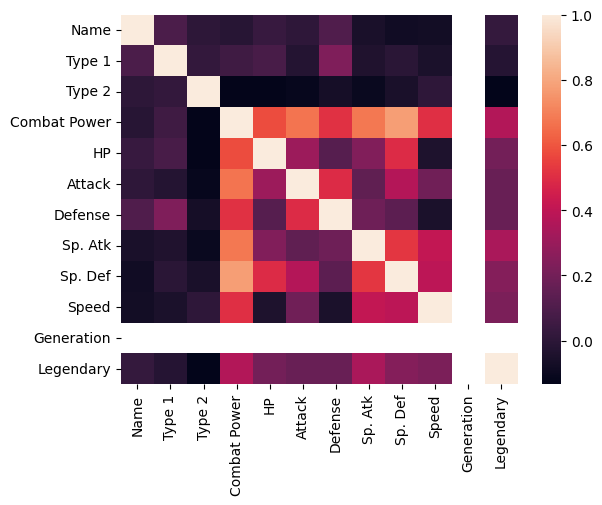

In [10]:
import seaborn as sns
sns.heatmap(df.corr())

In [11]:
selected_features = ['Name','Type 1','Type 2','HP','Defense','Speed','Legendary']

In [12]:
X = df[selected_features]
Y = df['Combat Power']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 2)

In [14]:
X_train.shape

(120, 7)

In [15]:
X_test.shape

(31, 7)

In [16]:
Y_train.shape

(120,)

In [17]:
Y_test.shape

(31,)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [19]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
from sklearn.linear_model import LinearRegression


In [21]:
regression = LinearRegression()
regression.fit(X_train,Y_train)

LinearRegression()

In [22]:
reg_predict = regression.predict(X_test)

In [23]:
import warnings 
warnings.filterwarnings('ignore')

<Axes: xlabel='Combat Power', ylabel='Density'>

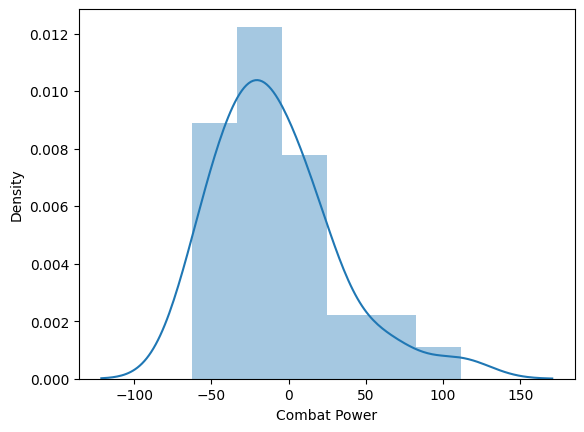

In [24]:
sns.distplot(reg_predict-Y_test, kde = True)

In [25]:
from sklearn.metrics import r2_score
score = r2_score(reg_predict, Y_test)
print("Accuracy = ", float("{:.2f}".format(score*100)), "%")

Accuracy =  78.19 %


In [26]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=0)
gbr.fit(X_train, Y_train)
boosted_score = gbr.score(X_test, Y_test)
print("Boosted accuracy = ", float("{:.2f}".format(boosted_score*100)), "%")

Boosted accuracy =  81.3 %
